In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_rows",50)
pd.set_option("display.max_columns",50)
import re

In [3]:
data=pd.read_csv("twitter.csv")

In [4]:
data.head(10)

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
5,5,3,1,2,0,1,"!!!!!!!!!!!!!!!!!!""@T_Madison_x: The shit just..."
6,6,3,0,3,0,1,"!!!!!!""@__BrighterDays: I can not just sit up ..."
7,7,3,0,3,0,1,!!!!&#8220;@selfiequeenbri: cause I'm tired of...
8,8,3,0,3,0,1,""" &amp; you might not get ya bitch back &amp; ..."
9,9,3,1,2,0,1,""" @rhythmixx_ :hobbies include: fighting Maria..."


In [5]:
data.drop(columns=["Unnamed: 0"],inplace=True)

In [6]:
data.head(5)

,count,hate_speech,offensive_language,neither,class,tweet
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


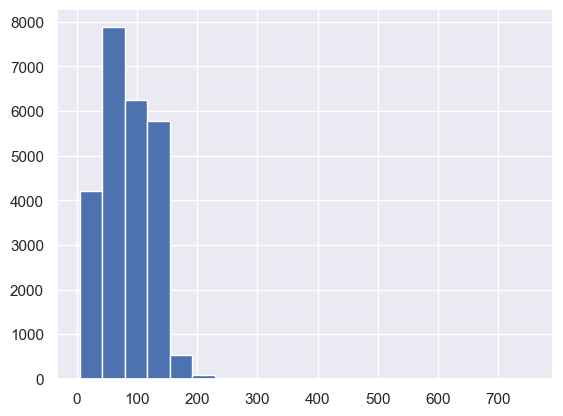

In [7]:
## checking the distribution of length of all the tweets
plt.hist(data.tweet.str.len(), bins=20)
plt.show()

In [8]:
data["class"].value_counts()

1    19190
2     4163
0     1430
Name: class, dtype: int64

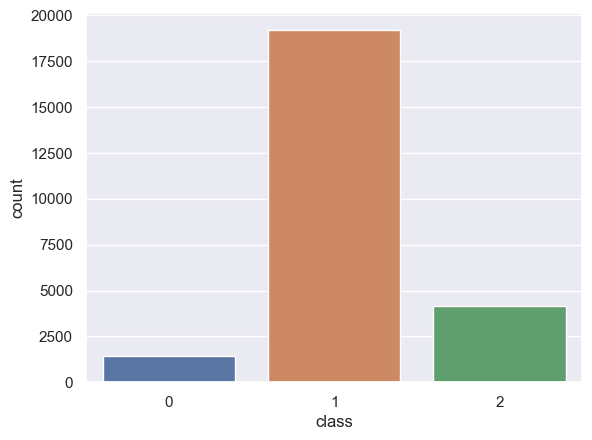

In [9]:
# Checking how different classes are distributed within the data
sns.countplot(x="class",data=data)
plt.show()

## Text Pre-processing

In [10]:
data["cleaned_tweet"]=""

In [11]:
#user-defined function to remove unwanted text patterns from the tweets

def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    return input_txt

In [12]:
#Removing Twitter Handles (@user)
data['cleaned_tweet'] = np.vectorize(remove_pattern)(data['tweet'], "@[\w]*")
#a regular expression which will pick any word starting with ‘@’
data.head(10)

,count,hate_speech,offensive_language,neither,class,tweet,cleaned_tweet
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,!!! RT : As a woman you shouldn't complain abo...
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,!!!!! RT : boy dats cold...tyga dwn bad for cu...
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,!!!!!!! RT Dawg!!!! RT : You ever fuck a bitc...
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,!!!!!!!!! RT : she look like a tranny
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,!!!!!!!!!!!!! RT : The shit you hear about me ...
5,3,1,2,0,1,"!!!!!!!!!!!!!!!!!!""@T_Madison_x: The shit just...","!!!!!!!!!!!!!!!!!!"": The shit just blows me..c..."
6,3,0,3,0,1,"!!!!!!""@__BrighterDays: I can not just sit up ...","!!!!!!"": I can not just sit up and HATE on ano..."
7,3,0,3,0,1,!!!!&#8220;@selfiequeenbri: cause I'm tired of...,!!!!&#8220;: cause I'm tired of you big bitche...
8,3,0,3,0,1,""" &amp; you might not get ya bitch back &amp; ...",""" &amp; you might not get ya bitch back &amp; ..."
9,3,1,2,0,1,""" @rhythmixx_ :hobbies include: fighting Maria...",""" :hobbies include: fighting Mariam""\n\nbitch"


In [13]:
#Removing Punctuations, Numbers, and Special Characters
#we will replace everything except characters and hashtags with spaces
#The regular expression “[^a-zA-Z#]” means anything except alphabets and ‘#’.
data.cleaned_tweet = data.cleaned_tweet.str.replace("[^a-zA-Z#]", " ")
data.head(10)

,count,hate_speech,offensive_language,neither,class,tweet,cleaned_tweet
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,RT As a woman you shouldn t complain abo...
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,RT boy dats cold tyga dwn bad for cu...
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,RT Dawg RT You ever fuck a bitc...
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,RT she look like a tranny
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,RT The shit you hear about me ...
5,3,1,2,0,1,"!!!!!!!!!!!!!!!!!!""@T_Madison_x: The shit just...",The shit just blows me c...
6,3,0,3,0,1,"!!!!!!""@__BrighterDays: I can not just sit up ...",I can not just sit up and HATE on ano...
7,3,0,3,0,1,!!!!&#8220;@selfiequeenbri: cause I'm tired of...,# cause I m tired of you big bitche...
8,3,0,3,0,1,""" &amp; you might not get ya bitch back &amp; ...",amp you might not get ya bitch back amp ...
9,3,1,2,0,1,""" @rhythmixx_ :hobbies include: fighting Maria...",hobbies include fighting Mariam bitch


In [14]:
#Removing Short Words
#remove all the words having length 3 or less. For example, terms like “hmm”, “oh” are of very little use.

data.cleaned_tweet = data.cleaned_tweet.apply(lambda x: ' '.join([w for w in x.split() if len(w) > 3]))
data.head(10)

,count,hate_speech,offensive_language,neither,class,tweet,cleaned_tweet
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,woman shouldn complain about cleaning your hou...
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,dats cold tyga cuffin place
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,Dawg ever fuck bitch start confused shit
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,look like tranny
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,shit hear about might true might faker than bi...
5,3,1,2,0,1,"!!!!!!!!!!!!!!!!!!""@T_Madison_x: The shit just...",shit just blows claim faithful down somebody s...
6,3,0,3,0,1,"!!!!!!""@__BrighterDays: I can not just sit up ...",just HATE another bitch much shit going
7,3,0,3,0,1,!!!!&#8220;@selfiequeenbri: cause I'm tired of...,cause tired bitches coming skinny girls
8,3,0,3,0,1,""" &amp; you might not get ya bitch back &amp; ...",might bitch back thats that
9,3,1,2,0,1,""" @rhythmixx_ :hobbies include: fighting Maria...",hobbies include fighting Mariam bitch


## Text Normalization

In [15]:
#First tokenize the tweets.
tokenized_tweet = data.cleaned_tweet.apply(lambda x: x.split())
tokenized_tweet.head()

0    [woman, shouldn, complain, about, cleaning, yo...
1                    [dats, cold, tyga, cuffin, place]
2     [Dawg, ever, fuck, bitch, start, confused, shit]
3                                 [look, like, tranny]
4    [shit, hear, about, might, true, might, faker,...
Name: cleaned_tweet, dtype: object

In [16]:
#normalize the tokenized tweets

from nltk.stem.porter import *
stemmer = PorterStemmer()
tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
tokenized_tweet.head()

0    [woman, shouldn, complain, about, clean, your,...
1                     [dat, cold, tyga, cuffin, place]
2       [dawg, ever, fuck, bitch, start, confus, shit]
3                                 [look, like, tranni]
4    [shit, hear, about, might, true, might, faker,...
Name: cleaned_tweet, dtype: object

In [17]:
# Now let’s stitch these tokens back together

for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])
data['cleaned_tweet'] = tokenized_tweet
data.head(10)

,count,hate_speech,offensive_language,neither,class,tweet,cleaned_tweet
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,woman shouldn complain about clean your hous s...
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,dat cold tyga cuffin place
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,dawg ever fuck bitch start confus shit
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,look like tranni
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,shit hear about might true might faker than bi...
5,3,1,2,0,1,"!!!!!!!!!!!!!!!!!!""@T_Madison_x: The shit just...",shit just blow claim faith down somebodi still...
6,3,0,3,0,1,"!!!!!!""@__BrighterDays: I can not just sit up ...",just hate anoth bitch much shit go
7,3,0,3,0,1,!!!!&#8220;@selfiequeenbri: cause I'm tired of...,caus tire bitch come skinni girl
8,3,0,3,0,1,""" &amp; you might not get ya bitch back &amp; ...",might bitch back that that
9,3,1,2,0,1,""" @rhythmixx_ :hobbies include: fighting Maria...",hobbi includ fight mariam bitch


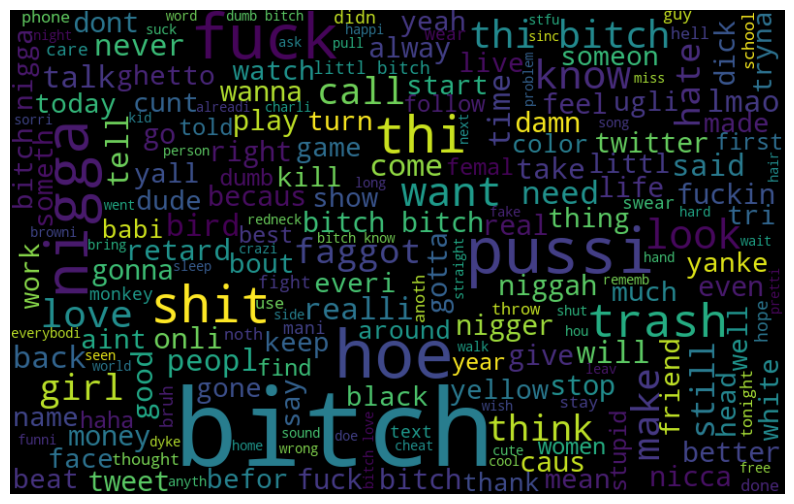

In [18]:
#Understanding the common words used in the tweets with WordCloud

all_words = ' '.join([text for text in data['cleaned_tweet']])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

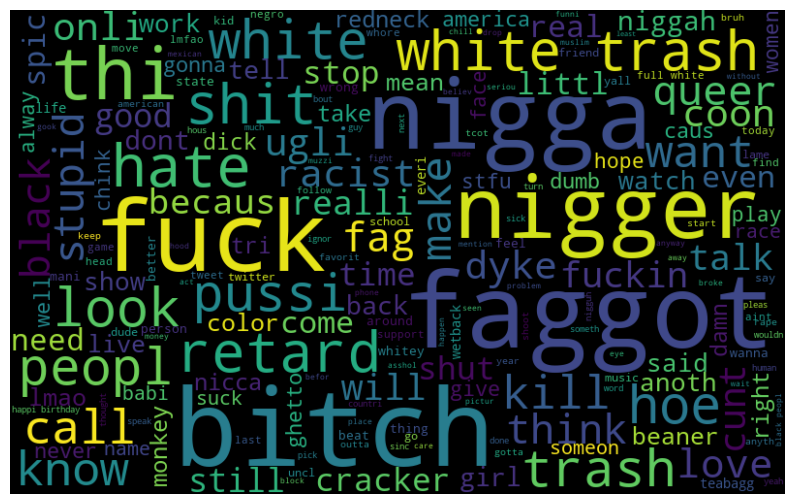

In [19]:
#Words in Tweets with class as 0

negative_words = ' '.join([text for text in data['cleaned_tweet'][data['class'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

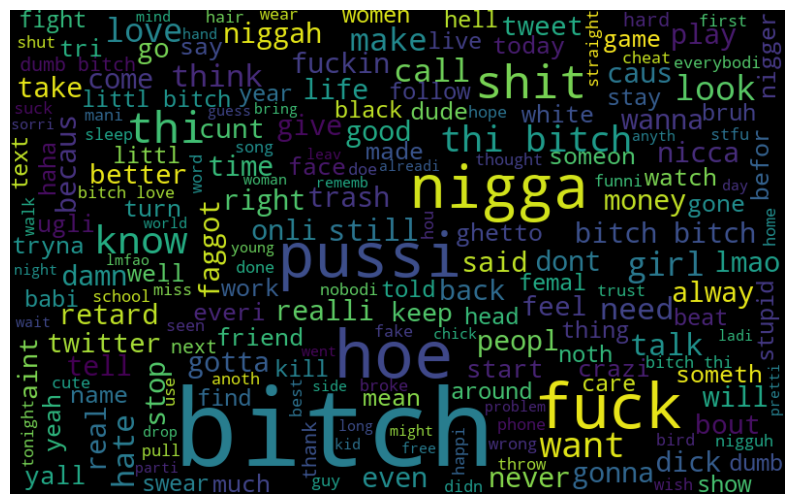

In [20]:
#Words in Tweets with class as 1

negative_words = ' '.join([text for text in data['cleaned_tweet'][data['class'] == 1]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

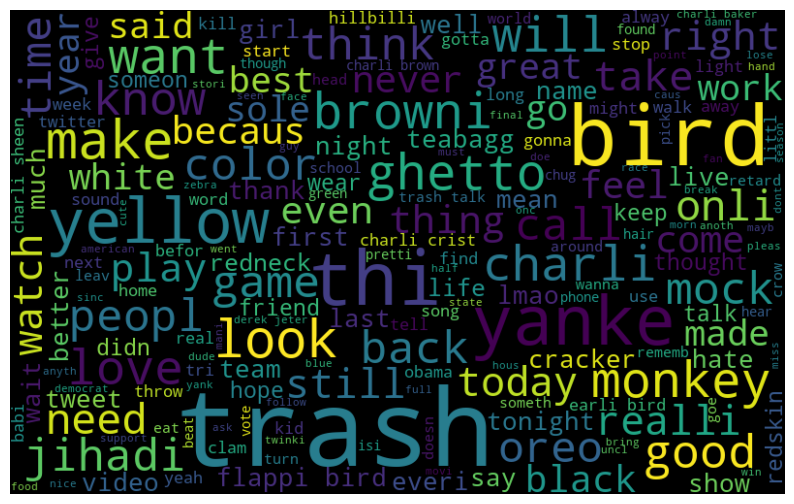

In [21]:
#Words in Tweets with class as 2

negative_words = ' '.join([text for text in data['cleaned_tweet'][data['class'] == 2]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [22]:
# function to collect hashtags

def hashtag_extract(x):
    hashtags = []    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)
    return hashtags
# extracting hashtags from tweets with class as 0

HT_class_0 = hashtag_extract(data["cleaned_tweet"][data["class"] == 0])
# extracting hashtags from tweets with class as 1

HT_class_1 = hashtag_extract(data["cleaned_tweet"][data["class"] == 1])

# extracting hashtags from tweets with class as 2
HT_class_2 = hashtag_extract(data["cleaned_tweet"][data["class"] == 2])
# unnesting list


HT_class_0 = sum(HT_class_0,[])
HT_class_1 = sum(HT_class_1,[])
HT_class_2 = sum(HT_class_2,[])

In [104]:
HT_class_0[0:5]

['tehgodclan',
 'gerryshalloweenparti',
 'blondeproblem',
 'shitmybosssay',
 'azmonsoon']

In [107]:
HT_class_1[0:5]

['shot', 'sevenon', 'happyhumpday', 'ahmesehwet', 'eaglesn']

In [109]:
HT_class_2[0:5]

['yanke', 'scalli', 'chav', 'sockfetish', 'stink']

In [26]:
import nltk

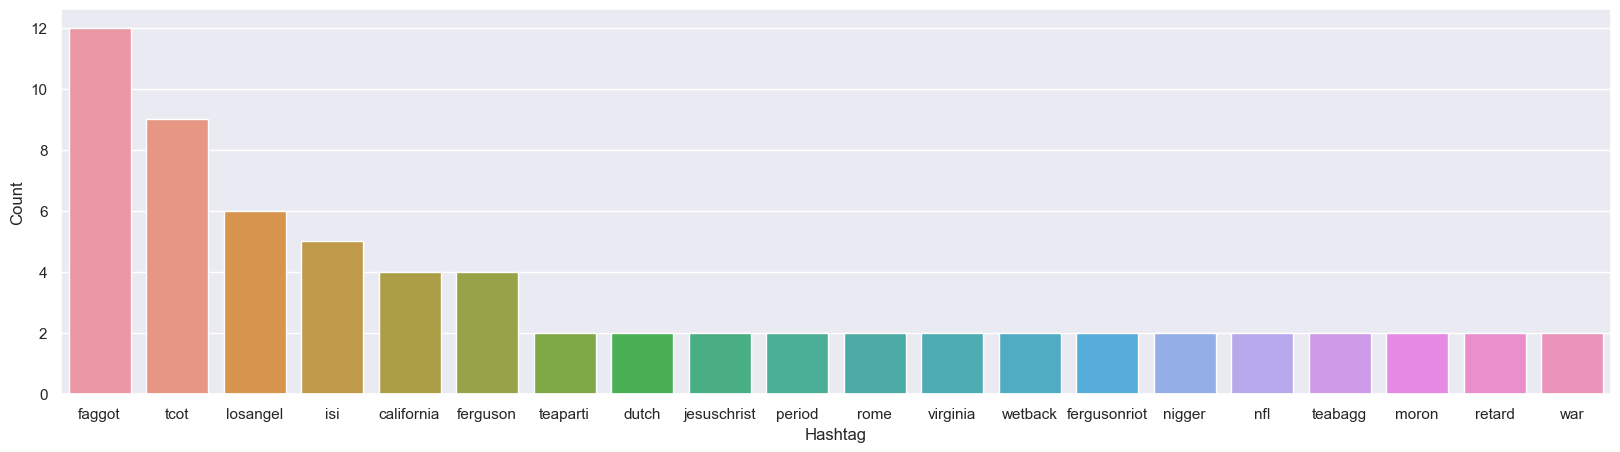

In [27]:
# Tweets with class 0

a = nltk.FreqDist(HT_class_0)
d = pd.DataFrame(
    {
    'Hashtag': list(a.keys()),
    'Count': list(a.values())
    }
)
# selecting top 20 most frequent hashtags

d = d.nlargest(columns="Count", n = 20)
plt.figure(figsize=(20,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
# plt.xticks(rotation=90)
plt.show()

### Looks like Class 0 represents Hate speech

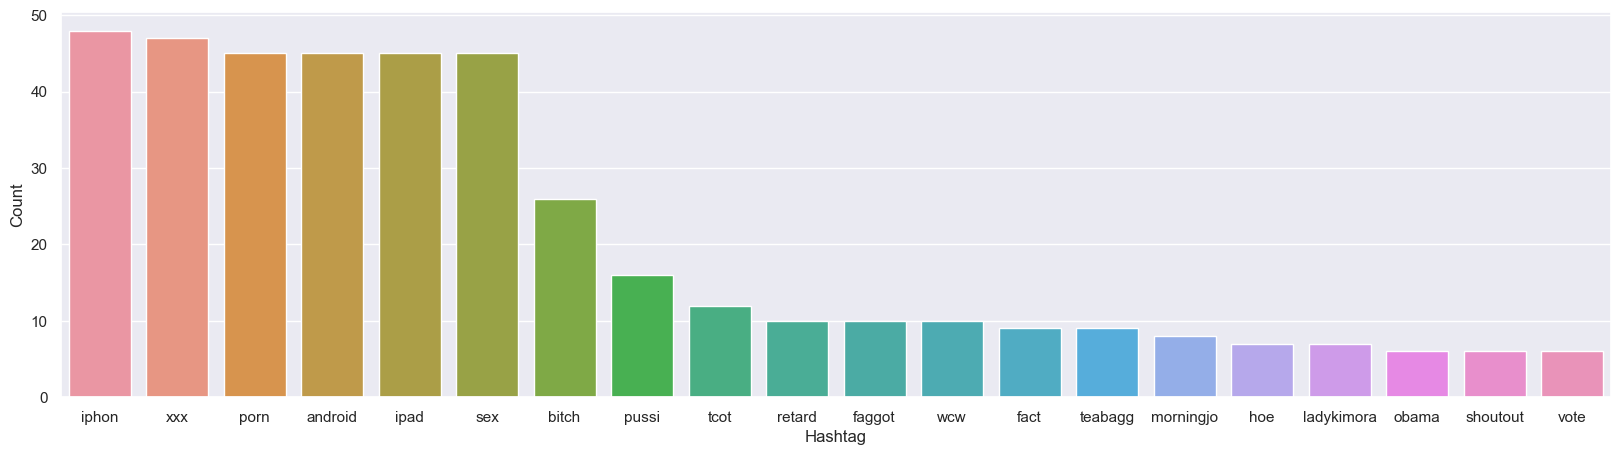

In [28]:
# Tweets with class 1

a = nltk.FreqDist(HT_class_1)
d = pd.DataFrame(
    {
    'Hashtag': list(a.keys()),
    'Count': list(a.values())
    }
)
# selecting top 20 most frequent hashtags

d = d.nlargest(columns="Count", n = 20)
plt.figure(figsize=(20,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
# plt.xticks(rotation=90)
plt.show()

### Looks like Class 1 represents Offensive speech

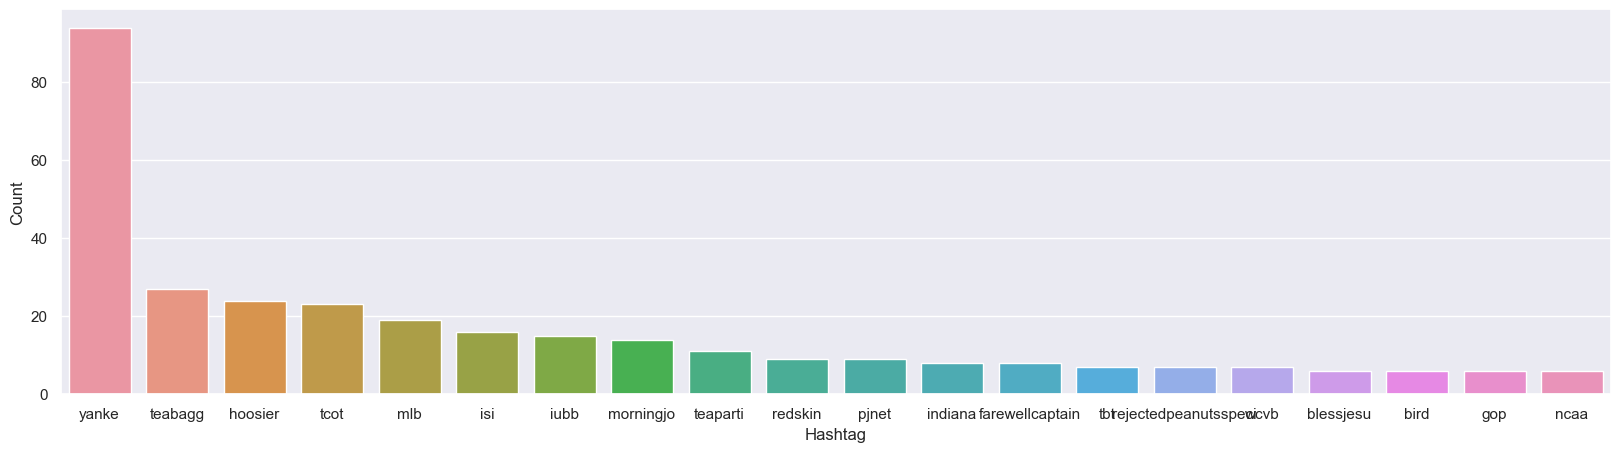

In [29]:
# Tweets with class 2

a = nltk.FreqDist(HT_class_2)
d = pd.DataFrame(
    {
    'Hashtag': list(a.keys()),
    'Count': list(a.values())
    }
)
# selecting top 20 most frequent hashtags

d = d.nlargest(columns="Count", n = 20)
plt.figure(figsize=(20,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
# plt.xticks(rotation=90)
plt.show()

### Looks like Class 2 represents neither Hate speech nor Offensive speech

### Feature Extraction

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import gensim

In [47]:
#Bag-of-Words Features
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(data['cleaned_tweet'])
bow.shape

(24783, 1000)

In [40]:
bow_df=pd.DataFrame(bow.toarray(), columns=bow_vectorizer.get_feature_names_out())

In [49]:
bow_df

,absolut,accept,account,act,actin,action,actual,admit,agre,aint,albino,alex,aliv,allow,alon,alreadi,alright,alway,amaz,america,american,android,angel,angri,anim,...,wont,word,work,world,worm,worri,wors,worst,worth,wouldn,write,wrong,xxx,yall,yank,yanke,yeah,year,yell,yellow,yesterday,young,yung,zebra,zone
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24778,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
24779,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
24780,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
24781,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [50]:
#TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(data['cleaned_tweet'])
tfidf.shape

(24783, 1000)

In [51]:
tfidf_df=pd.DataFrame(tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

In [52]:
tfidf_df

,absolut,accept,account,act,actin,action,actual,admit,agre,aint,albino,alex,aliv,allow,alon,alreadi,alright,alway,amaz,america,american,android,angel,angri,anim,...,wont,word,work,world,worm,worri,wors,worst,worth,wouldn,write,wrong,xxx,yall,yank,yanke,yeah,year,yell,yellow,yesterday,young,yung,zebra,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.32038,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24778,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
24779,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.381015,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
24780,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.412964,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.474224,0.0,0.0,0.0
24781,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0


In [111]:
# %%time

# tokenized_tweet = data["cleaned_tweet"].apply(lambda x: x.split()) # tokenizing

# new_model_w2v = gensim.models.Word2Vec(
#            tokenized_tweet,
#            #size=200, # desired no. of features/independent variables
#            window=5, # context window size
#            min_count=2, # Ignores all words with total frequency lower than 2.
#            sg = 1, # 1 for skip-gram model
#            seed = 34
#)

#new_model_w2v.train(tokenized_tweet, total_examples= len(data['cleaned_tweet']), epochs=20)

In [112]:
# new_model_w2v.wv.most_similar(positive="dinner")

In [113]:
# new_model_w2v.wv.most_similar(positive="bitch")

### Applying Logistic Regression

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [60]:
Y=data[["class"]]

In [82]:
X_bow=bow_df
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(X_bow,Y, random_state=42, test_size=0.3)

lreg = LogisticRegression(solver='lbfgs')

lreg.fit(xtrain_bow, ytrain)
print(lreg.score(xtrain_bow,ytrain))
print(lreg.score(xvalid_bow,yvalid))

0.9120359695642148
0.8850033624747814


In [84]:
#TF-IDF Features
X_tfidf=tfidf_df

xtrain_idf, xtest_idf, ytrain, ytest = train_test_split(X_tfidf,Y, random_state=42, test_size=0.3)


lreg = LogisticRegression(solver='lbfgs')

lreg.fit(xtrain_idf, ytrain)
print(lreg.score(xtrain_idf,ytrain))
print(lreg.score(xtest_idf,ytest))

0.9036200138344478
0.882985877605918


### Naive Bayes

In [93]:
from sklearn.naive_bayes import GaussianNB

In [94]:
#Bag-of-Words Features
nb=GaussianNB()
nb.fit(xtrain_bow, ytrain)
print(nb.score(xtrain_bow, ytrain))
print(nb.score(xvalid_bow,yvalid))

0.2727115517638921
0.2533960995292535


In [95]:
#TF-IDF Features
nb=GaussianNB()
nb.fit(xtrain_idf, ytrain)
print(nb.score(xtrain_idf, ytrain))
print(nb.score(xtest_idf,ytest))

0.27789946967950196
0.2583725622057835


### Support Vector Machine

In [88]:
from sklearn.svm import SVC

In [89]:
#Bag-of-Words Features

svc = SVC(kernel='linear', C=1, probability=True).fit(xtrain_bow, ytrain)
print(svc.score(xtrain_bow, ytrain))
print(svc.score(xvalid_bow,yvalid))

0.9133041272769196
0.8852723604572966


In [90]:
#TF-IDF Features

svc = SVC(kernel='linear', C=1, probability=True).fit(xtrain_idf,ytrain)
print(svc.score(xtrain_idf,ytrain))
print(svc.score(xtest_idf,ytest))

0.9020636384597648
0.8835238735709482


### KNN

In [96]:
from sklearn.neighbors import KNeighborsClassifier

In [100]:
#Bag-of-Words Features

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(xtrain_bow, ytrain)
print(knn.score(xtrain_bow, ytrain))
print(knn.score(xvalid_bow,yvalid))

0.8826377680424257
0.8558170813718897


In [101]:
#TF-IDF Features

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(xtrain_idf,ytrain)
print(knn.score(xtrain_idf,ytrain))
print(knn.score(xtest_idf,ytest))

0.8499538851740834
0.819502353732347


### Random Forest Classifier

In [91]:
#Bag-of-Words Features

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=400, random_state=11).fit(xtrain_bow, ytrain)
print(rfc.score(xtrain_bow, ytrain))
print(rfc.score(xvalid_bow,yvalid))

0.9848973945123357
0.8731674512441157


In [92]:
#TF-IDF Features

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=400, random_state=11).fit(xtrain_idf,ytrain)
print(rfc.score(xtrain_idf,ytrain))
print(rfc.score(xtest_idf,ytest))

0.98483975097994
0.8812373907195696


# Out of the all the above models, it seems Logistic Regression is giving the best result

# Using Bag of Words: Training Score: 91.2%; Testing Score: 88.5%
# Using TF-IDF: Training Score: 90.4%; Testing Score: 88.3%